# Predict The Primary Contributory Cause of Car Accidents

## Business Understanding

This project aims to support the Vehicle Safety Board by leveraging data from the Chicago Police Department's E-Crash system to identify patterns and primary contributory causes of traffic accidents. Through predictive modeling and data analysis, the project seeks to generate actionable insights to enable data-driven interventions to enhance road safety, optimize resource allocation, and inform policy decisions.

The transportation sector plays a pivotal role in any country's social and economic growth. However, the increasing number of vehicles on the roads has heightened the challenges of traffic management and safety. By efficiently analyzing traffic crash data, this project will contribute to significant advancements in road safety measures, public awareness, strategic policy-making, and effective resource deployment, ultimately fostering safer streets and proactive accident prevention.

##### Problem Statement

Traffic accidents in Chicago remain a significant public health and economic challenge, despite advancements in vehicle safety technology, traffic management systems, and the availability of data from the Chicago Police Department’s E-Crash system. The lack of detailed analysis and predictive capabilities hinders effective mitigation efforts and limits understanding of the primary contributory causes. This project aims to develop a predictive model to identify key factors driving traffic crashes, uncover actionable insights, and enable data-driven strategies to enhance road safety. By supporting the Vehicle Safety Board, the project seeks to reduce accidents, optimize resource allocation, and make Chicago’s roads safer for everyone.


##### Objectives

1. Predict the primary contributory cause of a car accident.
2. Identify high-risk locations for traffic accidents to prioritize interventions like increased patrols, signage, or infrastructure improvements.
3. Analyze the role of driver behaviors, such as speeding or distracted driving, to guide public awareness campaigns and enforcement strategies
4. Understand how the timing of accidents impacts crash severity to optimize resource deployment during high-risk periods.

##### Research Questions

1. What are the most common primary contributory causes of traffic accidents?
2. Which locations in Chicago experience the highest frequency of traffic accidents, and what patterns contribute to their high risk?
3. How do driver behaviors, such as speeding or distracted driving, influence the likelihood and severity of traffic accidents?
4. How does the timing of accidents (e.g., time of day, day of the week, or season) affect crash severity, and what insights can be drawn to optimize resource deployment?


##### Stakeholders

- Government and Public Agencies i.e Vehicle Safety Board
- Policymakers and Urban Planners
- General Public and Road Users
- Public Health and Safety Organizations

## Data Understanding

##### Importing Libraries

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Collect and Describe the data

In [4]:
# Import the dataset to be used and set the option to display all columns

df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
pd.set_option('display.max_columns', None)

In [5]:
# Inspect the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                794956 non-null  object 
 1   CRASH_DATE_EST_I               59606 non-null   object 
 2   CRASH_DATE                     794956 non-null  object 
 3   POSTED_SPEED_LIMIT             794956 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         794956 non-null  object 
 5   DEVICE_CONDITION               794956 non-null  object 
 6   WEATHER_CONDITION              794956 non-null  object 
 7   LIGHTING_CONDITION             794956 non-null  object 
 8   FIRST_CRASH_TYPE               794956 non-null  object 
 9   TRAFFICWAY_TYPE                794956 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      794956 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [6]:
# Inspect the stats for numerical columns

df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,794956.000000,1.990060e+05,794956.000000,794951.000000,794956.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.0,794956.000000,794956.000000,794956.000000,789567.000000,789567.000000
mean,28.402547,1.333032e+01,3688.085435,1242.916397,2.034919,0.189448,0.001195,0.020032,0.107025,0.061195,2.004313,0.0,13.202800,4.122344,6.787978,41.854788,-87.673450
std,6.179272,2.961623e+03,2887.990566,705.268208,0.452475,0.565654,0.037456,0.165673,0.422095,0.318451,1.158715,0.0,5.568727,1.980411,3.405398,0.337523,0.686153
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1248.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782429,-87.721709
50%,30.000000,2.000000e+00,3201.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874743,-87.674094
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924336,-87.633300
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [10]:
# Preview the first 5 rows

df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",09/05/2023 07:05:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,5500,S,WENTWORTH AVE,225.0,NaN,NaN,NaN,NaN,NaN,NaN,2,INCAPACITATING INJURY,3.0,0.0,1.0,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/22/2023 06:50:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,7900,S,CHICAGO SKYWAY OB,411.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/09/2023 11:40:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,10020,W,BALMORAL AVE,1650.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [12]:
# Drop columns with too many missing values & irrelevant info
df.drop(columns=['LOCATION', 'CRASH_RECORD_ID', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'INJURIES_INCAPACITATING', 
                 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 
                 'INJURIES_UNKNOWN', 'CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 
                 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 
                 'WORKERS_PRESENT_I'], inplace = True)


In [70]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format="%m/%d/%Y %I:%M:%S %p")
df['year'] = df['CRASH_DATE'].dt.year
accidents_2023 = df[df['year'] == 2023]

# Count the number of accidents
count_2023 = accidents_2023.shape[0]

print(f"Number of accidents in 2023: {count_2023}")

Number of accidents in 2023: 110560


In [72]:
df['year'].unique()

array([2023, 2019, 2022, 2020, 2021, 2018, 2016, 2017, 2015, 2024, 2013,
       2014])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_DATE               794956 non-null  object 
 1   POSTED_SPEED_LIMIT       794956 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE   794956 non-null  object 
 3   DEVICE_CONDITION         794956 non-null  object 
 4   WEATHER_CONDITION        794956 non-null  object 
 5   LIGHTING_CONDITION       794956 non-null  object 
 6   FIRST_CRASH_TYPE         794956 non-null  object 
 7   TRAFFICWAY_TYPE          794956 non-null  object 
 8   ALIGNMENT                794956 non-null  object 
 9   ROADWAY_SURFACE_COND     794956 non-null  object 
 10  ROAD_DEFECT              794956 non-null  object 
 11  REPORT_TYPE              771698 non-null  object 
 12  CRASH_TYPE               794956 non-null  object 
 13  DAMAGE                   794956 non-null  object 
 14  DATE

##### Exploratory Data Analysis
In this section, we will be exploring our data in relation to our objectives earlier highlighted

###### Visualizing Impact of crashes on economy and health

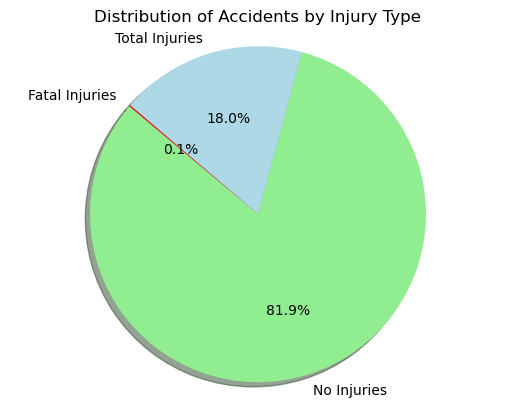

In [52]:
accidents_no_injuries = (df['INJURIES_TOTAL'] == 0).sum()  # Accidents with no injuries
total_injuries = df['INJURIES_TOTAL'].sum()  # Sum of all injuries
fatal_injuries = df['INJURIES_FATAL'].sum()  # Sum of fatal injuries

# Data for the pie chart
labels = ['No Injuries', 'Total Injuries', 'Fatal Injuries']
sizes = [accidents_no_injuries, total_injuries, fatal_injuries]
colors = ['lightgreen', 'lightblue', 'red']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Show the plot
plt.title('Distribution of Accidents by Injury Type')
plt.show()

###### Visualizing economic impact of accidents

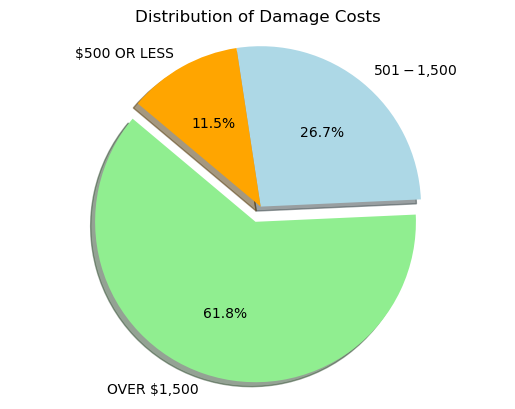

In [65]:
damage_counts = df['DAMAGE'].value_counts()


labels = damage_counts.index  
sizes = damage_counts.values  
colors = ['lightgreen', 'lightblue', 'orange']  
explode = (0.1, 0, 0)  

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Distribution of Damage Costs')
plt.show()

###### Visualizing Primary Contributory Causes of Car Accidents

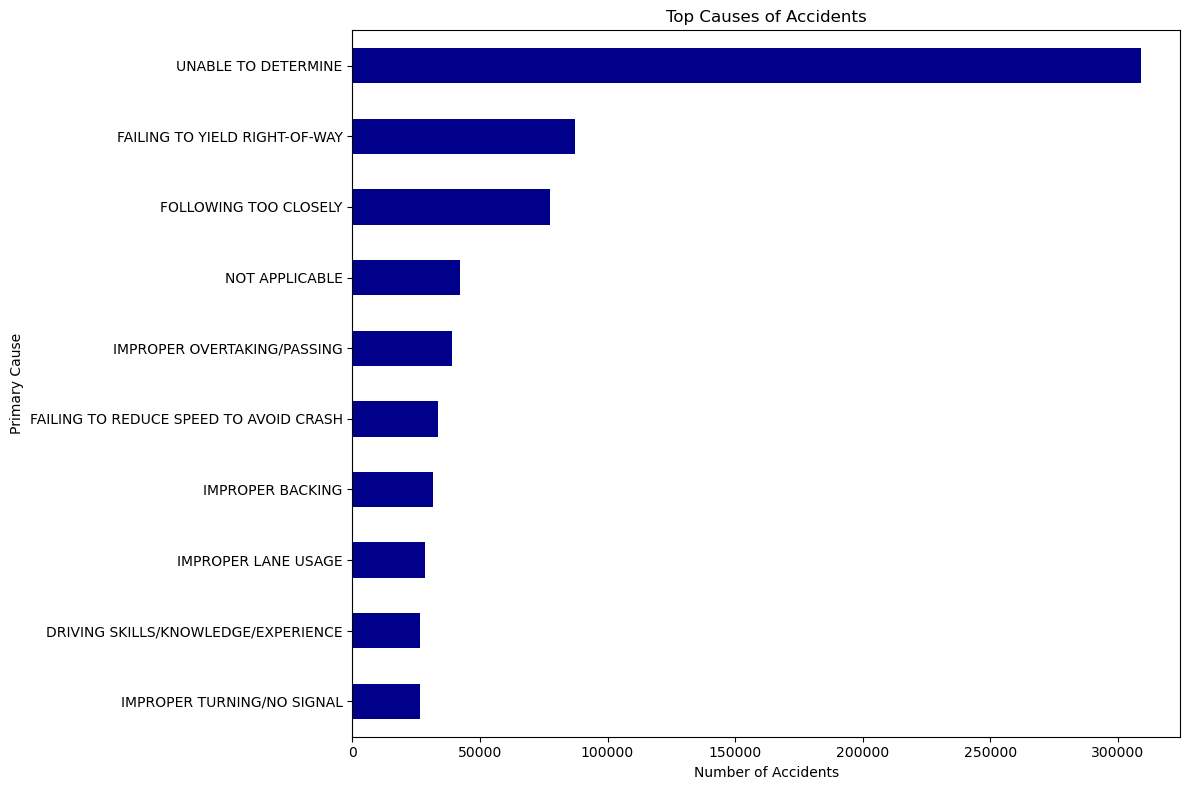

In [18]:
# Visualize the top 10 primary causes of accidents


primary_causes = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()  
top_10 = primary_causes[:10]  


plt.figure(figsize=(12, 8))
top_10.plot(kind='barh', color='darkblue')
plt.title('Top Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Primary Cause')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

###### Visualizing High-Risk Locations for Traffic Accidents

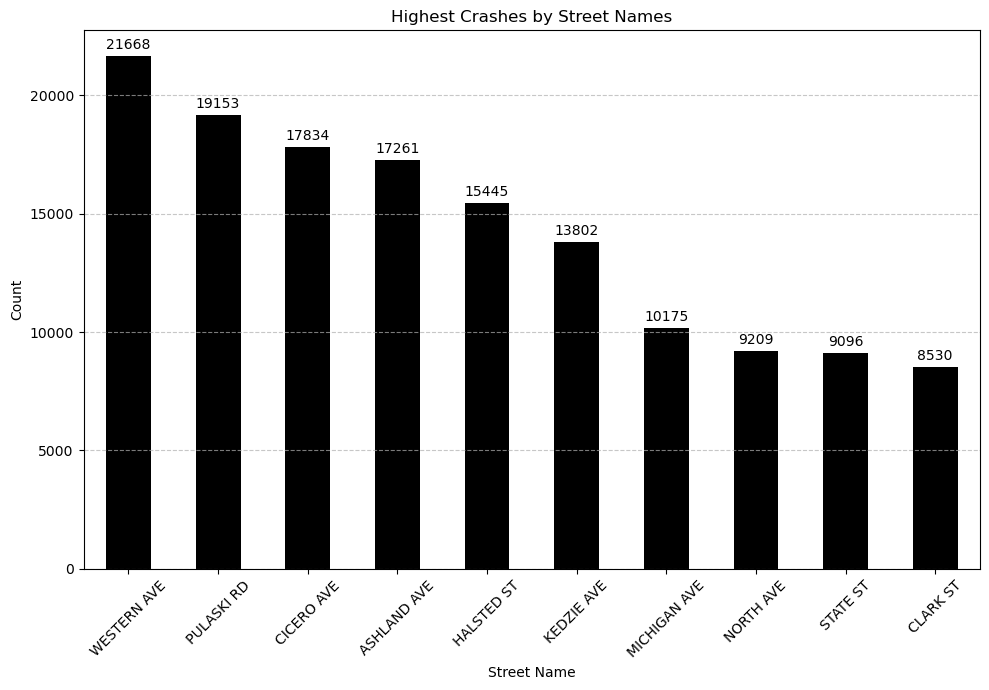

In [21]:
# Calculate value counts for the filtered DataFrame
filtered_counts = df['STREET_NAME'].value_counts()

# Select top 5 weather conditions
top_15_counts = filtered_counts.head(10)

plt.figure(figsize=(10, 7))
ax = top_15_counts.plot(kind='bar', color='black')
plt.title('Highest Crashes by Street Names')
plt.xlabel('Street Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

plt.show()

###### Visualizing Impact of Traffic Control Devices on Accidents


C:\Users\USER\AppData\Local\Temp\ipykernel_13624\4260738003.py:28: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  barplot = sns.barplot(x='STREET_NAME', y='CRASH_COUNT', hue='TRAFFIC_CONTROL_DEVICE', data=top_df, palette=colors)


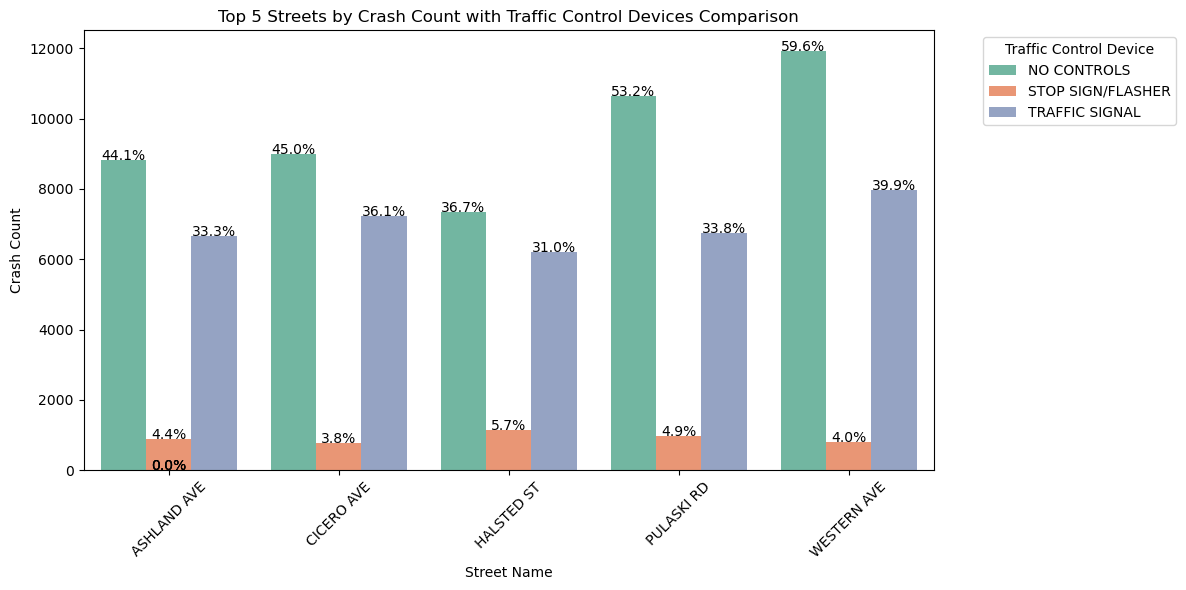

In [24]:
# Group by street name and traffic control device, and count the number of crashes
grouped = df.groupby(['STREET_NAME', 'TRAFFIC_CONTROL_DEVICE']).size().reset_index(name='CRASH_COUNT')

# Get top 5 streets by crash count
top_streets = grouped.groupby('STREET_NAME')['CRASH_COUNT'].sum().nlargest(5).index

# Filter the DataFrame for the top 5 streets
top_df = grouped[grouped['STREET_NAME'].isin(top_streets)]

# Get top 3 traffic control devices by crash count
top_devices = top_df.groupby('TRAFFIC_CONTROL_DEVICE')['CRASH_COUNT'].sum().nlargest(5).index

# Filter the DataFrame for the top 3 traffic control devices
top_df = top_df[top_df['TRAFFIC_CONTROL_DEVICE'].isin(top_devices)]

# Filter out 'UNKNOWN' and 'OTHERS' traffic control devices
top_df = top_df[~top_df['TRAFFIC_CONTROL_DEVICE'].isin(['UNKNOWN', 'OTHER'])]

# Calculate percentages
total_crashes = top_df.groupby('STREET_NAME')['CRASH_COUNT'].transform('sum')
top_df['PERCENTAGE'] = (top_df['CRASH_COUNT'] / total_crashes) * 100

# Create a custom color palette
colors = sns.color_palette('Set2', n_colors=len(top_devices))

# Create a bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='STREET_NAME', y='CRASH_COUNT', hue='TRAFFIC_CONTROL_DEVICE', data=top_df, palette=colors)

# Add labels and title
plt.xlabel('Street Name')
plt.ylabel('Crash Count')
plt.title('Top 5 Streets by Crash Count with Traffic Control Devices Comparison')
plt.xticks(rotation=45)
plt.legend(title='Traffic Control Device', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2, height + 1, f'{height/200:.1f}%', ha='center')

plt.tight_layout()
plt.show()

###### Visualizing the Impact of Speed on Traffic Accidents


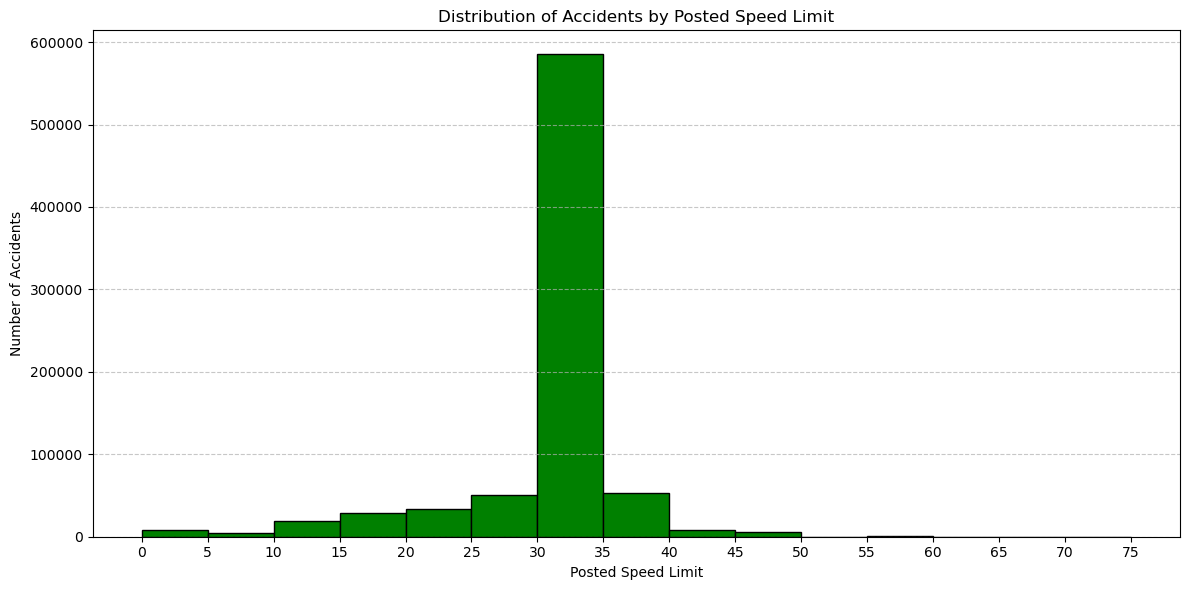

In [29]:
# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(df['POSTED_SPEED_LIMIT'], bins=range(0, 80, 5),color='green', edgecolor='black')

# Add labels and title
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Posted Speed Limit')
plt.xticks(range(0, 80, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###### Visualizing the Impact of Timing on Crashes


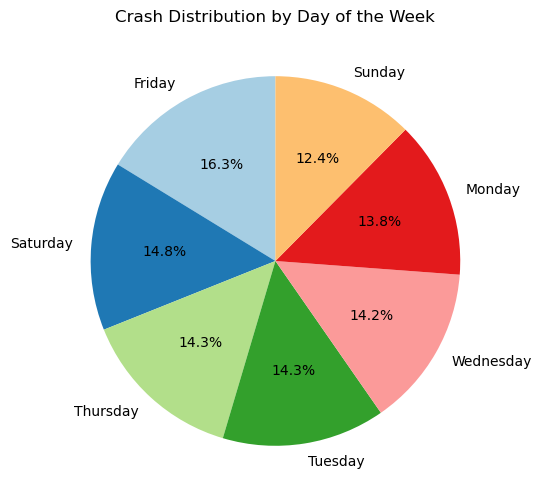

In [32]:
# Map numbers to days of the week

day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

df['CRASH_DAY_OF_WEEK'] = df['CRASH_DAY_OF_WEEK'].map(day_mapping)

# Pie chart visualizations for accident occurrence on different days of the week

day_counts = df['CRASH_DAY_OF_WEEK'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Crash Distribution by Day of the Week')
plt.show()

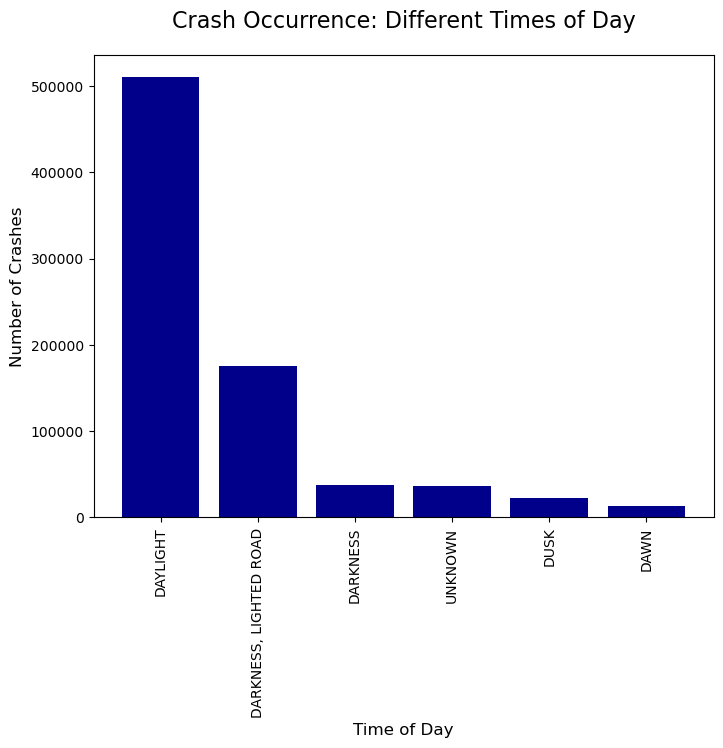

In [34]:
# Bar chart to visualize crash occurrence based on time of day

# Count occurrences of Daytime and Nighttime crashes
time_counts = df['LIGHTING_CONDITION'].value_counts()

# Visualize the counts in a bar chart
plt.figure(figsize=(8, 6))
plt.bar(time_counts.index, time_counts.values, color=[ 'darkblue'])
plt.title('Crash Occurrence: Different Times of Day', fontsize=16, pad=20)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(fontsize=10, rotation =90)
plt.yticks(fontsize=10)
plt.show()

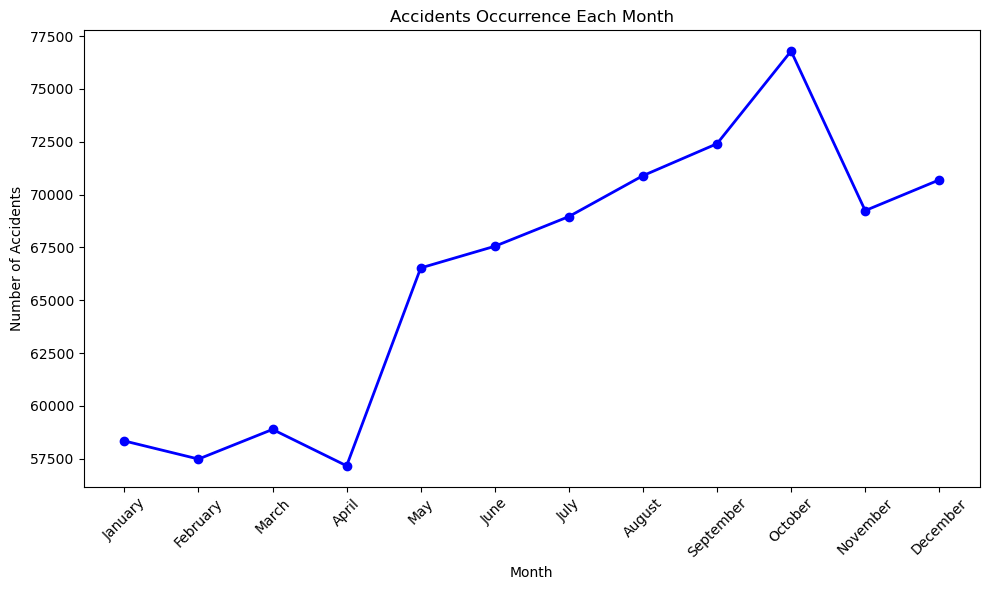

In [36]:
# Visualize accident trends each month
monthly_counts = df['CRASH_MONTH'].value_counts().sort_index()

# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Accidents Occurrence Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.tight_layout()
plt.show()

###### Visualizing Accident Trends Each Year

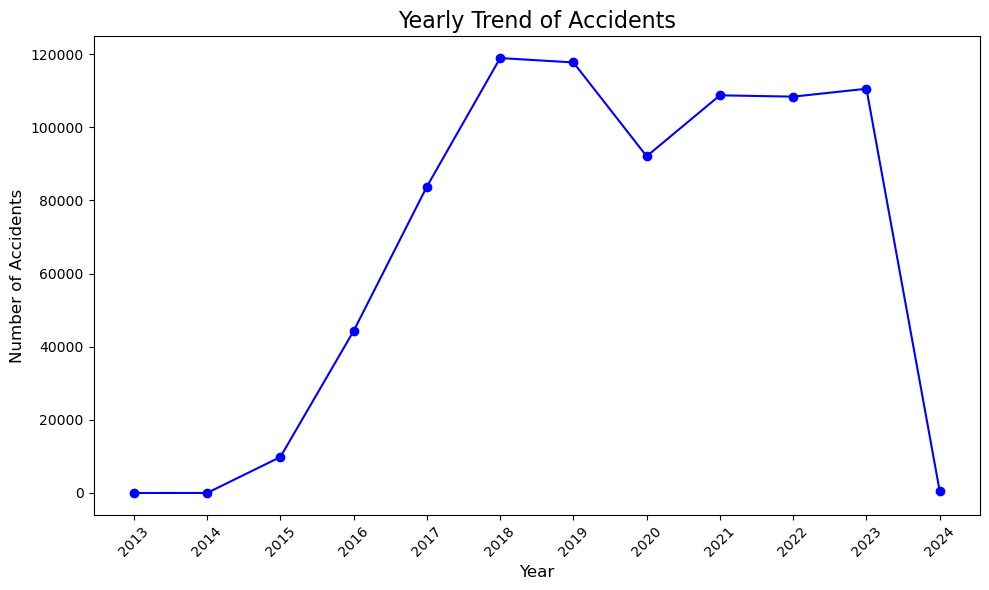

In [81]:
accidents_per_year = df['year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='blue')


plt.title('Yearly Trend of Accidents', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(accidents_per_year.index, rotation=45)  # Rotate x-axis labels if needed


plt.tight_layout()
plt.show()